The following file contains an annotated submission detailing each of the method we followed in our final approach.

##Read the files

In [1]:
#Some initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#Mounting google drive, optional if the data is uploaded
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The below cells read the excel files from google drive and convert them to csv for better functionality with pandas.

In [3]:
tr_df = pd.read_excel('/content/drive/MyDrive/Dev_data_to_be_shared.xlsx')
tr_df.to_csv('/content/train.csv', index=False)

In [4]:
te_df = pd.read_excel('/content/drive/MyDrive/validation_data_to_be_shared.xlsx')
te_df.to_csv('/content/test.csv', index=False)

Change the directory to wherever the file is before running the next two cells

In [5]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

<ipython-input-5-77e71e7fe26d>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/content/train.csv')
<ipython-input-5-77e71e7fe26d>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('/content/test.csv')


In [6]:
train_df.head(2)

Primary key  Target account_opening_date country_code  demog_1 demog_2  \
0            1       0           2023-02-18           IN     53.0     3.0   
1            2       0           2023-02-01           IN     55.0     1.0   

         income  demog_3 city_tier     occupation  ... demog_39  email_domain  \
0  100001 to 5L    101.0     Rural  Self_Employed  ...        1         gmail   
1       0 to 1L    101.0    Tier 1       Salaried  ...        1         gmail   

   demog_40  demog_41  others_42  others_43 others_44  others_45  demog_42  \
0       low         1        NaN        0.0       NaN        NaN         1   
1      High         1        NaN        NaN       NaN        NaN         1   

   demog_43  
0    medium  
1      High  

[2 rows x 178 columns]

In [7]:
test_df.head(2)

Primary key account_opening_date country_code  demog_1 demog_2  \
0      9000001           2023-03-25           IN     56.0     2.0   
1      9000002           2023-01-15           IN     55.0     1.0   

         income  demog_3 city_tier     occupation demog_4  ...  demog_39  \
0     5L to 10L    101.0    Tier 7  Self_Employed       N  ...         1   
1  100001 to 5L    101.0    Tier 5       Salaried       N  ...         1   

   email_domain  demog_40  demog_41  others_42 others_43  others_44  \
0         gmail      High         1        NaN       NaN        NaN   
1         gmail       low         1        NaN       NaN        NaN   

   others_45  demog_42  demog_43  
0        NaN         1      High  
1        NaN         1    medium  

[2 rows x 177 columns]

##Data Comparison
Here we plot some graphs and make some inferences and decide on what to do with the data.

In [ ]:
mules_df = train_df[train_df['Target'] == 1]
non_mules_df = train_df[train_df['Target'] == 0]

In [ ]:
mules_df.head(2)

Primary key  Target account_opening_date country_code  demog_1 demog_2  \
98000        98001       1           22/02/2023           IN     55.0     7.0   
98001        98002       1           04/01/2023           IN     51.0     1.0   

             income  demog_3 city_tier occupation  ... demog_39  email_domain  \
98000       0 to 1L    101.0     Rural      Other  ...        1         gmail   
98001  100001 to 5L    101.0    Tier 1      Other  ...        1         gmail   

       demog_40  demog_41  others_42 others_43 others_44  others_45 demog_42  \
98000      High         1        NaN       NaN       NaN        NaN        1   
98001    medium         1        NaN       NaN       NaN        NaN        1   

      demog_43  
98000     High  
98001   medium  

[2 rows x 178 columns]

In [ ]:
test_columns = test_df.columns.tolist()

In [ ]:
numerical_columns = test_df.select_dtypes(include='number')

# List to store columns with less than 8 unique values
numer_test = []

# Iterate over numerical columns
for column in numerical_columns.columns:
    unique_values = test_df[column].nunique()
    if unique_values < 8:
        numer_test.append(column)

In [ ]:
test_columns = test_columns + numer_test

In [ ]:
test_df_plt = test_df
train_df_plt = train_df

In [ ]:
# pd.unique(test_df['txn_71'])

In [ ]:
test_df_plt.fillna(-1, inplace = True)
train_df_plt.fillna(-1, inplace = True)

In [ ]:
for x in test_df.select_dtypes(include = 'object').columns.tolist():
  if test_df[x].nunique() != train_df[x].nunique():
    print(x)
    print("test :",test_df_plt[x].nunique())
    print("train :",train_df_plt[x].nunique())
    print(test_df_plt[x].nunique() - train_df_plt[x].nunique())
    print(list(set(pd.unique(test_df_plt[x])).difference(set(pd.unique(train_df_plt[x])))))
    print(list(set(pd.unique(train_df_plt[x])).difference(set(pd.unique(test_df_plt[x])))))

In [ ]:
numer = train_df_plt.select_dtypes(include='number').columns.tolist()
train_df_plt[numer] = train_df_plt[numer].astype(float)

In [ ]:
non_numer = list(set(train_df_plt.columns.tolist()) - set(train_df_plt.select_dtypes(include='number').columns.tolist()))

In [ ]:
for x in non_numer:

    class_counts_m = train_df_plt[x].value_counts(normalize=True) * 100
    class_counts_n = test_df_plt[x].value_counts(normalize=True) * 100
    # Get unique classes from both DataFrames
    all_classes = set(class_counts_m.index) | set(class_counts_n.index)

    # Fill missing values with 0 for consistent plotting
    class_counts_m = class_counts_m.reindex(all_classes).fillna(0)
    class_counts_n = class_counts_n.reindex(all_classes).fillna(0)

    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(28, 20))

    bar_width = 0.35
    index = range(len(all_classes))
    bar1 = ax.bar(index, class_counts_m, bar_width, label='Train', color='red')
    bar2 = ax.bar([i + bar_width for i in index], class_counts_n, bar_width, label='Test', color='skyblue')

    # Add labels, title, and legend
    plt.title(f'Percentage Frequency of Classes', fontsize = 24)
    plt.xlabel(x, fontsize = 20)
    plt.ylabel('Percentage Frequency (%)', fontsize = 20)
    ax.set_xticks([i + bar_width / 2 for i in index])
    for i, v in enumerate(class_counts_m):
      ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

    for i, v in enumerate(class_counts_n):
      ax.text(i + bar_width, v + 1, f'{v:.2f}%', ha='center', va='bottom')
    ax.set_xticklabels(all_classes)
    ax.set_ylim(0, 120)
    plt.legend()

    plt.show()

In [ ]:
for x in non_numer:
    class_counts_m = mules_df[x].value_counts(normalize=True) * 100
    class_counts_n = non_mules_df[x].value_counts(normalize=True) * 100

    # Get unique classes from both DataFrames
    all_classes = set(class_counts_m.index) | set(class_counts_n.index)

    # Fill missing values with 0 for consistent plotting
    class_counts_m = class_counts_m.reindex(all_classes).fillna(0)
    class_counts_n = class_counts_n.reindex(all_classes).fillna(0)

    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(28, 20))

    bar_width = 0.35
    index = range(len(all_classes))
    bar1 = ax.bar(index, class_counts_m, bar_width, label='Mules', color='red')
    bar2 = ax.bar([i + bar_width for i in index], class_counts_n, bar_width, label='Non_mules', color='skyblue')

    # Add labels, title, and legend
    plt.title(f'Percentage Frequency of Classes', fontsize = 24)
    plt.xlabel(x, fontsize = 20)
    plt.ylabel('Percentage Frequency (%)', fontsize = 20)
    ax.set_xticks([i + bar_width / 2 for i in index])
    for i, v in enumerate(class_counts_m):
      ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

    for i, v in enumerate(class_counts_n):
      ax.text(i + bar_width, v + 1, f'{v:.2f}%', ha='center', va='bottom')
    ax.set_xticklabels(all_classes)
    ax.set_ylim(0, 120)
    plt.legend()

    plt.show()

In [ ]:
train_df_plt.drop('Target', axis = 1, inplace = True)

In [ ]:
numerical_columns = train_df_plt.select_dtypes(include='number')

# List to store columns with less than 8 unique values
numer = []

# Iterate over numerical columns
for column in numerical_columns.columns:
    unique_values = train_df[column].nunique()
    if unique_values < 40:
        numer.append(column)

In [ ]:
for x in numer:
    class_counts_m = train_df_plt[x].value_counts(normalize=True) * 100
    class_counts_n = test_df_plt[x].value_counts(normalize=True) * 100

    # Get unique classes from both DataFrames
    all_classes = set(class_counts_m.index) | set(class_counts_n.index)

    # Fill missing values with 0 for consistent plotting
    class_counts_m = class_counts_m.reindex(all_classes).fillna(0)
    class_counts_n = class_counts_n.reindex(all_classes).fillna(0)

    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(28, 20))

    bar_width = 0.35
    index = range(len(all_classes))
    bar1 = ax.bar(index, class_counts_m, bar_width, label='Train', color='skyblue')
    bar2 = ax.bar([i + bar_width for i in index], class_counts_n, bar_width, label='Test', color='red')

    # Add labels, title, and legend
    plt.title(f'Percentage Frequency of Classes', fontsize = 24)
    plt.xlabel(x, fontsize = 20)
    plt.ylabel('Percentage Frequency (%)', fontsize = 20)
    ax.set_xticks([i + bar_width / 2 for i in index])
    for i, v in enumerate(class_counts_m):
      ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

    for i, v in enumerate(class_counts_n):
      ax.text(i + bar_width, v + 1, f'{v:.2f}%', ha='center', va='bottom')
    ax.set_xticklabels(all_classes)
    ax.set_ylim(0, 120)
    plt.legend()

    plt.show()

In [ ]:
for x in numer:
    class_counts_m = mules_df[x].value_counts(normalize=True) * 100
    class_counts_n = non_mules_df[x].value_counts(normalize=True) * 100

    # Get unique classes from both DataFrames
    all_classes = set(class_counts_m.index) | set(class_counts_n.index)

    # Fill missing values with 0 for consistent plotting
    class_counts_m = class_counts_m.reindex(all_classes).fillna(0)
    class_counts_n = class_counts_n.reindex(all_classes).fillna(0)

    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(28, 20))

    bar_width = 0.35
    index = range(len(all_classes))
    bar1 = ax.bar(index, class_counts_m, bar_width, label='Mules', color='skyblue')
    bar2 = ax.bar([i + bar_width for i in index], class_counts_n, bar_width, label='Non-Mules', color='red')

    # Add labels, title, and legend
    plt.title(f'Percentage Frequency of Classes', fontsize = 24)
    plt.xlabel(x, fontsize = 20)
    plt.ylabel('Percentage Frequency (%)', fontsize = 20)
    ax.set_xticks([i + bar_width / 2 for i in index])
    for i, v in enumerate(class_counts_m):
      ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

    for i, v in enumerate(class_counts_n):
      ax.text(i + bar_width, v + 1, f'{v:.2f}%', ha='center', va='bottom')
    ax.set_xticklabels(all_classes)
    ax.set_ylim(0, 120)
    plt.legend()

    plt.show()

##Dropping columns with only 1 Unique Value

In [8]:
unq_cols = []
for column_name in train_df.columns:
    unique_values_count = train_df[column_name].nunique()
    if unique_values_count == 1:
        unq_cols.append(column_name)
        train_df[column_name].value_counts()
        print(f"Column '{column_name}' has only 1 unique value.")

print(unq_cols)

Column 'demog_7' has only 1 unique value.
Column 'demog_10' has only 1 unique value.
Column 'demog_12' has only 1 unique value.
Column 'txn_35' has only 1 unique value.
Column 'txn_36' has only 1 unique value.
Column 'txn_49' has only 1 unique value.
Column 'txn_50' has only 1 unique value.
Column 'txn_65' has only 1 unique value.
Column 'txn_70' has only 1 unique value.
Column 'txn_71' has only 1 unique value.
Column 'txn_72' has only 1 unique value.
Column 'demog_38' has only 1 unique value.
['demog_7', 'demog_10', 'demog_12', 'txn_35', 'txn_36', 'txn_49', 'txn_50', 'txn_65', 'txn_70', 'txn_71', 'txn_72', 'demog_38']


In [17]:
train_df.drop(unq_cols, axis = 1, inplace = True)
test_df.drop(unq_cols, axis = 1, inplace = True)

In [19]:
train_df.head(2)

Primary key  Target account_opening_date country_code  demog_1 demog_2  \
0            1       0           2023-02-18           IN     53.0     3.0   
1            2       0           2023-02-01           IN     55.0     1.0   

         income  demog_3 city_tier     occupation  ... demog_39  email_domain  \
0  100001 to 5L    101.0     Rural  Self_Employed  ...        1         gmail   
1       0 to 1L    101.0    Tier 1       Salaried  ...        1         gmail   

   demog_40  demog_41  others_42  others_43  others_44  others_45  demog_42  \
0       low         1        NaN        0.0        NaN        NaN         1   
1      High         1        NaN        NaN        NaN        NaN         1   

   demog_43  
0    medium  
1      High  

[2 rows x 166 columns]

In [18]:
test_df.head(2)

Primary key account_opening_date country_code  demog_1 demog_2  \
0      9000001           2023-03-25           IN     56.0     2.0   
1      9000002           2023-01-15           IN     55.0     1.0   

         income  demog_3 city_tier     occupation demog_4  ...  demog_39  \
0     5L to 10L    101.0    Tier 7  Self_Employed       N  ...         1   
1  100001 to 5L    101.0    Tier 5       Salaried       N  ...         1   

   email_domain  demog_40  demog_41  others_42  others_43  others_44  \
0         gmail      High         1        NaN        NaN        NaN   
1         gmail       low         1        NaN        NaN        NaN   

   others_45  demog_42  demog_43  
0        NaN         1      High  
1        NaN         1    medium  

[2 rows x 165 columns]

##Process the column 'Account_Opening_Date'

In [27]:
train_df['account_opening_date'][0].split('-')

['2023', '02', '18']

In [32]:
def date_preprocess(df):
  df['day'] = df['account_opening_date'].str.split('-').str[2].astype(int)
  df['month'] = df['account_opening_date'].str.split('-').str[1].astype(int)
  df['year'] = df['account_opening_date'].str.split('-').str[0].astype(int)
  df['date_column'] = pd.to_datetime(df['account_opening_date'], format='%Y/%m/%d')
  df['day_of_week'] = df['date_column'].dt.day_name()
  df.drop(columns=['account_opening_date','date_column'],axis=1,inplace=True)
  return df

In [33]:
train_df = date_preprocess(train_df)
test_df = date_preprocess(test_df)

In [34]:
train_df.head(2)

Primary key  Target  country_code  demog_1 demog_2        income  demog_3  \
0            1       0             1     53.0     3.0  100001 to 5L    101.0   
1            2       0             1     55.0     1.0       0 to 1L    101.0   

  city_tier     occupation demog_4  ...  others_42  others_43  others_44  \
0     Rural  Self_Employed       N  ...        NaN        0.0        NaN   
1    Tier 1       Salaried       N  ...        NaN        NaN        NaN   

   others_45  demog_42  demog_43  day  month  year  day_of_week  
0        NaN         1    medium   18      2  2023     Saturday  
1        NaN         1      High    1      2  2023    Wednesday  

[2 rows x 169 columns]

In [35]:
test_df.head(2)

Primary key  country_code  demog_1 demog_2        income  demog_3  \
0      9000001             1     56.0     2.0     5L to 10L    101.0   
1      9000002             1     55.0     1.0  100001 to 5L    101.0   

  city_tier     occupation demog_4  demog_5  ...  others_42  others_43  \
0    Tier 7  Self_Employed       N      4.0  ...        NaN        NaN   
1    Tier 5       Salaried       N      2.0  ...        NaN        NaN   

   others_44  others_45  demog_42  demog_43  day  month  year  day_of_week  
0        NaN        NaN         1      High   25      3  2023     Saturday  
1        NaN        NaN         1    medium   15      1  2023       Sunday  

[2 rows x 168 columns]

##dType Preprocessing

We observed that some categorical columns had values that seemed out of place. We replace them with nans

In [36]:
row_zz, col_zz = np.where(train_df == 'ZZ')
train_df.iloc[row_zz, col_zz] = np.nan

row_zz, col_zz = np.where(test_df == 'ZZ')
test_df.iloc[row_zz, col_zz] = np.nan

In [37]:
# Find object columns that contain both integer and floating-point values
def dtype_correction(df):
  mixed_type_columns = []
  for col in df.select_dtypes(include='object').columns:
      unique_values = df[col].apply(type).unique()
      if int in unique_values and float in unique_values:
          mixed_type_columns.append(col)

  # Convert identified columns to float
  df[mixed_type_columns] = df[mixed_type_columns].astype(float)
  return df

In [38]:
train_df = dtype_correction(train_df)
test_df = dtype_correction(test_df)
# Now, the specified columns have been converted to float

In [39]:
train_df.head(2)

Primary key  Target  country_code  demog_1  demog_2        income  demog_3  \
0            1       0             1     53.0      3.0  100001 to 5L    101.0   
1            2       0             1     55.0      1.0       0 to 1L    101.0   

  city_tier     occupation demog_4  ...  others_42  others_43  others_44  \
0     Rural  Self_Employed       N  ...        NaN        0.0        NaN   
1    Tier 1       Salaried       N  ...        NaN        NaN        NaN   

   others_45  demog_42  demog_43  day  month  year  day_of_week  
0        NaN         1    medium   18      2  2023     Saturday  
1        NaN         1      High    1      2  2023    Wednesday  

[2 rows x 169 columns]

In [40]:
test_df.head(2)

Primary key  country_code  demog_1 demog_2        income  demog_3  \
0      9000001             1     56.0     2.0     5L to 10L    101.0   
1      9000002             1     55.0     1.0  100001 to 5L    101.0   

  city_tier     occupation demog_4  demog_5  ...  others_42  others_43  \
0    Tier 7  Self_Employed       N      4.0  ...        NaN        NaN   
1    Tier 5       Salaried       N      2.0  ...        NaN        NaN   

   others_44  others_45  demog_42  demog_43  day  month  year  day_of_week  
0        NaN        NaN         1      High   25      3  2023     Saturday  
1        NaN        NaN         1    medium   15      1  2023       Sunday  

[2 rows x 168 columns]

##High Frequency one hot encoding

There are a few columns that have multiple categories, for eg. Country code. But these columns have a very high frequency of a specific category, for eg. IN. We notice that one hot encoding these columns to contain 1 if it that specific category and 0 if not helps us tackle
- sparsity of data which might arise if creating multiple one hot encoded columns.
- new data points that might be present in test data which might not have been encountered in train.


In [22]:
def set_1_IN(x):
    if x == 'IN':
        return 1
    else:
        return 0

train_df['country_code'] = train_df['country_code'].apply(set_1_IN)
test_df['country_code'] = test_df['country_code'].apply(set_1_IN)

In [23]:
def set_1_gmail(x):
    if x == 'gmail':
        return 1
    else:
        return 0

train_df['email_domain'] = train_df['email_domain'].apply(set_1_gmail)
test_df['email_domain'] = test_df['email_domain'].apply(set_1_gmail)

In [42]:
train_df.head(2)

Primary key  Target  country_code  demog_1  demog_2        income  demog_3  \
0            1       0             1     53.0      3.0  100001 to 5L    101.0   
1            2       0             1     55.0      1.0       0 to 1L    101.0   

  city_tier     occupation demog_4  ...  others_42  others_43  others_44  \
0     Rural  Self_Employed       N  ...        NaN        0.0        NaN   
1    Tier 1       Salaried       N  ...        NaN        NaN        NaN   

   others_45  demog_42  demog_43  day  month  year  day_of_week  
0        NaN         1    medium   18      2  2023     Saturday  
1        NaN         1      High    1      2  2023    Wednesday  

[2 rows x 169 columns]

In [44]:
test_df.head(2)

Primary key  country_code  demog_1 demog_2        income  demog_3  \
0      9000001             1     56.0     2.0     5L to 10L    101.0   
1      9000002             1     55.0     1.0  100001 to 5L    101.0   

  city_tier     occupation demog_4  demog_5  ...  others_42  others_43  \
0    Tier 7  Self_Employed       N      4.0  ...        NaN        NaN   
1    Tier 5       Salaried       N      2.0  ...        NaN        NaN   

   others_44  others_45  demog_42  demog_43  day  month  year  day_of_week  
0        NaN        NaN         1      High   25      3  2023     Saturday  
1        NaN        NaN         1    medium   15      1  2023       Sunday  

[2 rows x 168 columns]

##Drop columns with high percentage of nans.

We drop those columns that have a nan percentage > $90$

In [45]:
percentage_null_values_per_numerical_column = (train_df.isnull().sum() / len(train_df)) * 100
columns_to_drop = percentage_null_values_per_numerical_column[percentage_null_values_per_numerical_column > 90].index
print(columns_to_drop)

Index(['others_42', 'others_43', 'others_44', 'others_45'], dtype='object')


In [46]:
train_df.drop(columns=columns_to_drop, axis=1, inplace=True)
test_df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [47]:
train_df.head(2)

Primary key  Target  country_code  demog_1  demog_2        income  demog_3  \
0            1       0             1     53.0      3.0  100001 to 5L    101.0   
1            2       0             1     55.0      1.0       0 to 1L    101.0   

  city_tier     occupation demog_4  ...  demog_39  email_domain  demog_40  \
0     Rural  Self_Employed       N  ...         1             1       low   
1    Tier 1       Salaried       N  ...         1             1      High   

   demog_41  demog_42  demog_43  day  month  year  day_of_week  
0         1         1    medium   18      2  2023     Saturday  
1         1         1      High    1      2  2023    Wednesday  

[2 rows x 165 columns]

In [48]:
test_df.head(2)

Primary key  country_code  demog_1 demog_2        income  demog_3  \
0      9000001             1     56.0     2.0     5L to 10L    101.0   
1      9000002             1     55.0     1.0  100001 to 5L    101.0   

  city_tier     occupation demog_4  demog_5  ...  demog_39  email_domain  \
0    Tier 7  Self_Employed       N      4.0  ...         1             1   
1    Tier 5       Salaried       N      2.0  ...         1             1   

   demog_40  demog_41  demog_42  demog_43  day  month  year  day_of_week  
0      High         1         1      High   25      3  2023     Saturday  
1       low         1         1    medium   15      1  2023       Sunday  

[2 rows x 164 columns]

In [49]:
primary = 'Primary key'
test_primary = pd.DataFrame(test_df[primary])
train_df.drop(primary, axis = 1, inplace=True)
test_df.drop(primary, axis = 1, inplace = True)

In [50]:
train_df.head(2)

Target  country_code  demog_1  demog_2        income  demog_3 city_tier  \
0       0             1     53.0      3.0  100001 to 5L    101.0     Rural   
1       0             1     55.0      1.0       0 to 1L    101.0    Tier 1   

      occupation demog_4  demog_5  ...  demog_39  email_domain  demog_40  \
0  Self_Employed       N      3.0  ...         1             1       low   
1       Salaried       N      2.0  ...         1             1      High   

   demog_41  demog_42  demog_43  day  month  year  day_of_week  
0         1         1    medium   18      2  2023     Saturday  
1         1         1      High    1      2  2023    Wednesday  

[2 rows x 164 columns]

In [51]:
test_df.head(2)

country_code  demog_1 demog_2        income  demog_3 city_tier  \
0             1     56.0     2.0     5L to 10L    101.0    Tier 7   
1             1     55.0     1.0  100001 to 5L    101.0    Tier 5   

      occupation demog_4  demog_5  demog_6  ...  demog_39  email_domain  \
0  Self_Employed       N      4.0      1.0  ...         1             1   
1       Salaried       N      2.0      1.0  ...         1             1   

   demog_40  demog_41  demog_42  demog_43  day  month  year  day_of_week  
0      High         1         1      High   25      3  2023     Saturday  
1       low         1         1    medium   15      1  2023       Sunday  

[2 rows x 163 columns]

##Plot correlation matrix and drop duplicates

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
correlation_matrix = train_df.corr()

<ipython-input-53-6ba67237420e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


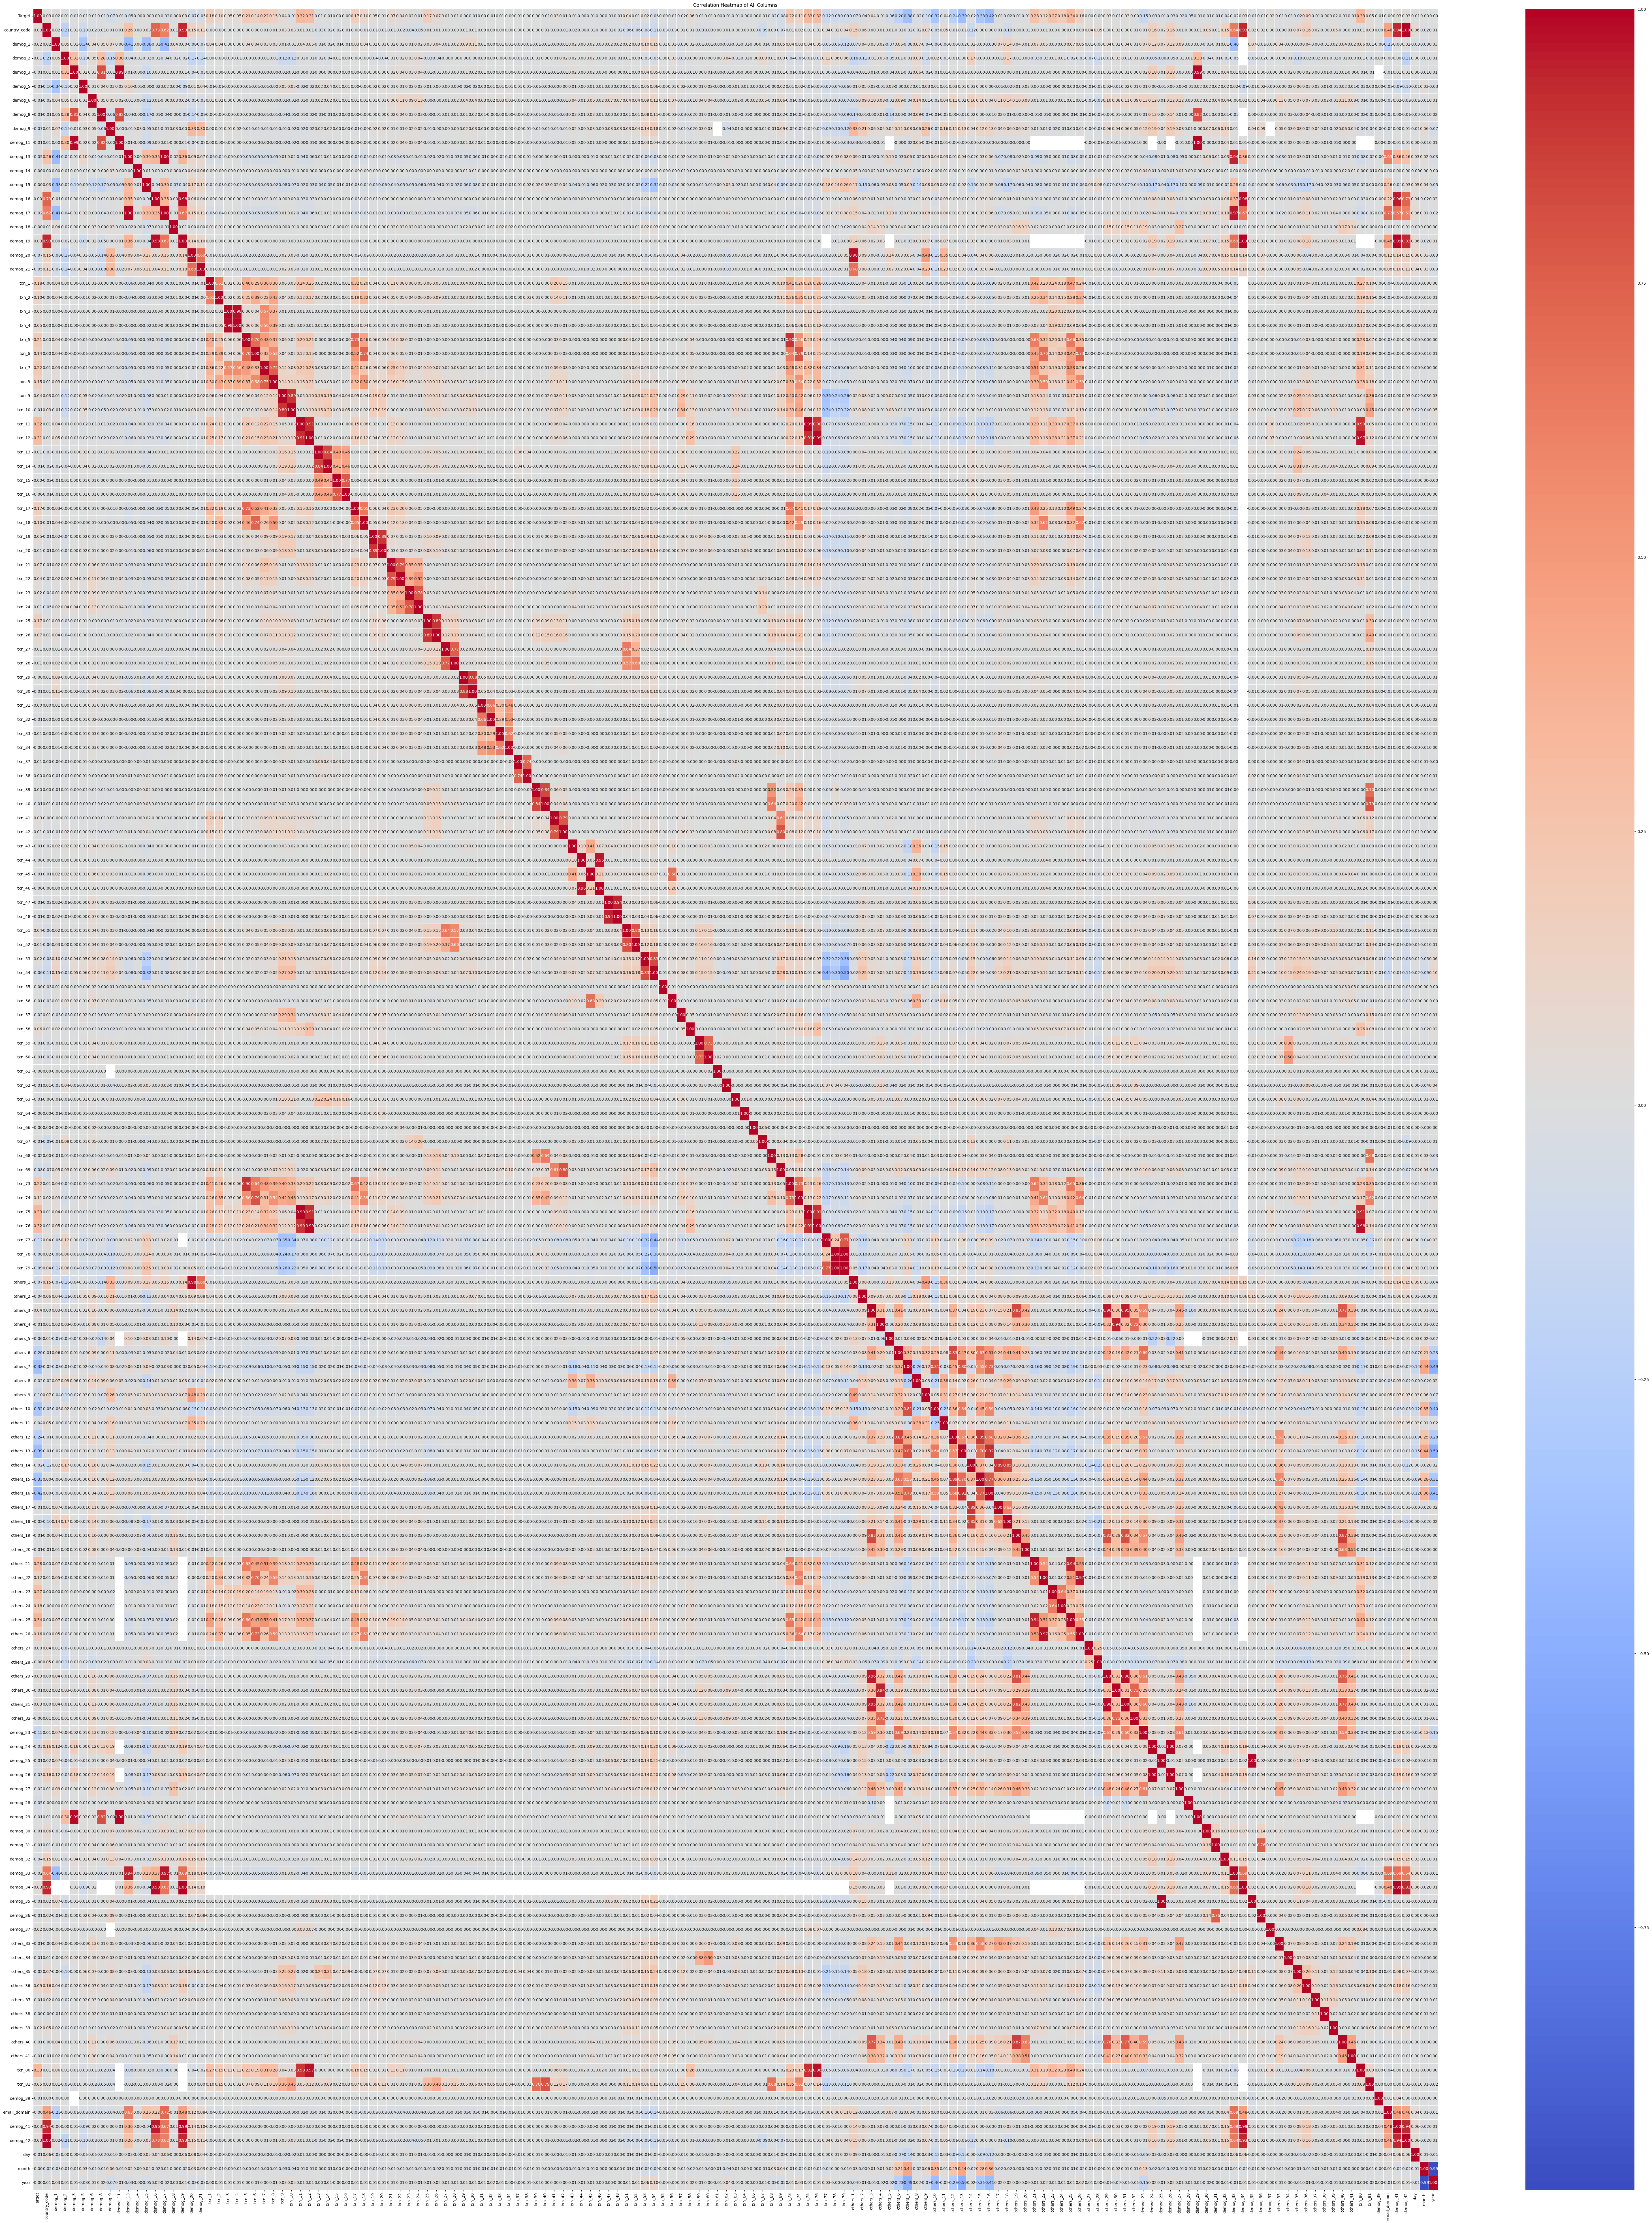

In [54]:
plt.figure(figsize=(80, 100))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of All Columns')

plt.show()

Besides the normal trend of having a left diagonal of correlations = $1$, we notice something interesting. There are some input columns that have correlation = $1$ with other input columns. This means that one column is a linear transformation of another and hence can be dropped.

In [56]:
# Find pairs of features with correlation greater than 0.99
corr_1_pairs = [(col1, col2) for col1 in correlation_matrix.columns
                   for col2 in correlation_matrix.columns
                   if col1 < col2 and abs(correlation_matrix.loc[col1, col2]) == 1]

# Display pairs with high correlation
print("Pairs of features with correlation = 1:")
for pair in corr_1_pairs:
  print(pair)

Pairs of features with correlation = 1:
('country_code', 'demog_42')
('demog_11', 'demog_29')
('demog_13', 'demog_17')
('txn_78', 'txn_79')
('demog_25', 'demog_35')


In [57]:
train_df.drop(columns = [x[1] for x in corr_1_pairs], inplace=True)
test_df.drop(columns = [x[1] for x in corr_1_pairs], inplace=True)

In [58]:
train_df.head(2)

Target  country_code  demog_1  demog_2        income  demog_3 city_tier  \
0       0             1     53.0      3.0  100001 to 5L    101.0     Rural   
1       0             1     55.0      1.0       0 to 1L    101.0    Tier 1   

      occupation demog_4  demog_5  ...  txn_81  demog_39  email_domain  \
0  Self_Employed       N      3.0  ...     1.0         1             1   
1       Salaried       N      2.0  ...    28.0         1             1   

   demog_40  demog_41  demog_43  day  month  year  day_of_week  
0       low         1    medium   18      2  2023     Saturday  
1      High         1      High    1      2  2023    Wednesday  

[2 rows x 159 columns]

In [59]:
test_df.head(2)

country_code  demog_1 demog_2        income  demog_3 city_tier  \
0             1     56.0     2.0     5L to 10L    101.0    Tier 7   
1             1     55.0     1.0  100001 to 5L    101.0    Tier 5   

      occupation demog_4  demog_5  demog_6  ...  txn_81  demog_39  \
0  Self_Employed       N      4.0      1.0  ...     9.0         1   
1       Salaried       N      2.0      1.0  ...     NaN         1   

   email_domain  demog_40  demog_41  demog_43  day  month  year  day_of_week  
0             1      High         1      High   25      3  2023     Saturday  
1             1       low         1    medium   15      1  2023       Sunday  

[2 rows x 158 columns]

##Drop columns if sum of correlations is less than a certain threshold

In [60]:
threshold = 1e-5

In [61]:
# Calculate the sum of correlation values for each column
sum_correlation_per_column = correlation_matrix.abs().sum(axis=0).sort_values(ascending=False)

In [64]:
# Display the sum of correlation values in descending order
print("\nSum of Correlation Values for Each Column (Descending Order):")
print(sum_correlation_per_column)


Sum of Correlation Values for Each Column (Descending Order):
txn_74       15.784138
others_25    15.662424
txn_73       15.364977
others_12    15.075084
others_15    14.876002
               ...    
demog_28      1.757868
demog_39      1.714968
txn_55        1.662643
txn_66        1.335259
txn_61        1.182999
Length: 155, dtype: float64


In [65]:
sum_corr_less_thres = sum_correlation_per_column[sum_correlation_per_column < threshold].index.tolist()

In [66]:
sum_corr_less_thres

[]

In [67]:
train_df.drop(sum_corr_less_thres, axis=1, inplace=True)
test_df.drop(sum_corr_less_thres, axis=1, inplace=True)

In [68]:
train_df.head(2)

Target  country_code  demog_1  demog_2        income  demog_3 city_tier  \
0       0             1     53.0      3.0  100001 to 5L    101.0     Rural   
1       0             1     55.0      1.0       0 to 1L    101.0    Tier 1   

      occupation demog_4  demog_5  ...  txn_81  demog_39  email_domain  \
0  Self_Employed       N      3.0  ...     1.0         1             1   
1       Salaried       N      2.0  ...    28.0         1             1   

   demog_40  demog_41  demog_43  day  month  year  day_of_week  
0       low         1    medium   18      2  2023     Saturday  
1      High         1      High    1      2  2023    Wednesday  

[2 rows x 159 columns]

In [69]:
test_df.head(2)

country_code  demog_1 demog_2        income  demog_3 city_tier  \
0             1     56.0     2.0     5L to 10L    101.0    Tier 7   
1             1     55.0     1.0  100001 to 5L    101.0    Tier 5   

      occupation demog_4  demog_5  demog_6  ...  txn_81  demog_39  \
0  Self_Employed       N      4.0      1.0  ...     9.0         1   
1       Salaried       N      2.0      1.0  ...     NaN         1   

   email_domain  demog_40  demog_41  demog_43  day  month  year  day_of_week  
0             1      High         1      High   25      3  2023     Saturday  
1             1       low         1    medium   15      1  2023       Sunday  

[2 rows x 158 columns]

##Processing columns with boolean values

In [70]:
bool_columns = []

for col in train_df.columns:
    unique_types = train_df[col].apply(type).unique()
    if bool in unique_types:
        bool_columns.append(col)

print("Columns with both bool and str types:", bool_columns)

Columns with both bool and str types: []


In [71]:
def handle_bool(x):
  if x == True:
    return 1
  elif x == False:
    return 0
  else:
    return -9999

In [72]:
for x in bool_columns:
  train_df[x] = train_df[x].apply(handle_bool)
  test_df[x] = test_df[x].apply(handle_bool)

##Categorical and One Hot Encoding

In [73]:
%%capture
!pip install category_encoders

In [74]:
train_target = pd.DataFrame(train_df['Target'])

In [75]:
train_df.drop('Target', axis = 1, inplace = True)

In [76]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

We fill nan values in categorical and numerical columns with appropriate constants

In [77]:
categorical_columns = train_df.select_dtypes(include=['object']).columns
numerical_columns = train_df.select_dtypes(include=['number']).columns

train_df[categorical_columns] = train_df[categorical_columns].fillna('missing')
train_df[numerical_columns] = train_df[numerical_columns].fillna(-9999)

test_df[categorical_columns] = test_df[categorical_columns].fillna('missing')
test_df[numerical_columns] = test_df[numerical_columns].fillna(-9999)

If the number of unique values in a categorical column is < 8, we one hot encode it

In [78]:
one_hot_threshold = 8
cat_col_below_thres = []

# One-hot encode columns with fewer unique values
for col in categorical_columns:
    unique_values_count = train_df[col].nunique()
    if unique_values_count <= one_hot_threshold:
        cat_col_below_thres.append(col)

In [79]:
# Create a DataFrame to store one-hot encoded columns
one_hot_df_train = pd.DataFrame()
one_hot_df_test = pd.DataFrame()

for col in cat_col_below_thres:
    encoder = OneHotEncoder(drop='first', sparse_output = False, handle_unknown = 'ignore')

    one_hot_encoded = encoder.fit_transform(train_df[[col]])
    one_hot_columns = encoder.get_feature_names_out([col])
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)
    one_hot_df_train = pd.concat([one_hot_df_train, one_hot_encoded_df], axis=1)

    one_hot_encoded_test = encoder.transform(test_df[[col]])
    one_hot_columns_test = encoder.get_feature_names_out([col])
    one_hot_encoded_df_test = pd.DataFrame(one_hot_encoded_test, columns=one_hot_columns_test)
    one_hot_df_test = pd.concat([one_hot_df_test, one_hot_encoded_df_test], axis=1)

train_df = pd.concat([train_df, one_hot_df_train], axis=1)
train_df = train_df.drop(cat_col_below_thres, axis=1)

test_df = pd.concat([test_df, one_hot_df_test], axis=1)
test_df = test_df.drop(cat_col_below_thres, axis=1)

The remaining categorical columns are encoded using a Target Encoder

In [80]:
rem_categorical_columns = [elem for elem in categorical_columns if elem not in cat_col_below_thres]

# Map columns with more unique values
for col in rem_categorical_columns:
    unique_values_count = train_df[col].nunique()
    if unique_values_count > one_hot_threshold:
      encoder = TargetEncoder()
      train_df[col] = encoder.fit_transform(train_df[col], train_target)
      test_df[col] = encoder.transform(test_df[col])

In [82]:
train_df.head(2)

country_code   demog_1   demog_2    income   demog_3  city_tier  \
0      0.208157  0.180957  0.195337  0.518743  0.003606   1.167447   
1      0.208157  0.182011  0.194274 -0.060300  0.003606  -0.942397   

   occupation   demog_5   demog_6   demog_8  ...  demog_40_missing  \
0    1.475871  0.013978  0.002619  0.197312  ...         -0.199102   
1   -0.617967  0.007654  0.002619  0.197312  ...         -0.199102   

   demog_43_low  demog_43_medium  demog_43_missing  day_of_week_Monday  \
0     -0.310843         0.796401         -0.196152           -0.428159   
1     -0.310843        -1.255649         -0.196152           -0.428159   

   day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0              2.672824            -0.28407             -0.432614   
1             -0.374136            -0.28407             -0.432614   

   day_of_week_Tuesday  day_of_week_Wednesday  
0            -0.431049              -0.443495  
1            -0.431049               2.254818  

[2 rows x 175 columns]

In [83]:
test_df.head(2)

country_code   demog_1   demog_2    income   demog_3  city_tier  \
0      0.208157  0.182538  0.194806 -0.176720  0.003606   0.017807   
1      0.208157  0.182011  0.194274  0.518743  0.003606  -0.446631   

   occupation   demog_5   demog_6   demog_8  ...  demog_40_missing  \
0    1.475871  0.020302  0.002619  0.197312  ...         -0.199102   
1   -0.617967  0.007654  0.002619  0.197312  ...         -0.199102   

   demog_43_low  demog_43_medium  demog_43_missing  day_of_week_Monday  \
0     -0.310843        -1.255649         -0.196152           -0.428159   
1     -0.310843         0.796401         -0.196152           -0.428159   

   day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0              2.672824           -0.284070             -0.432614   
1             -0.374136            3.520264             -0.432614   

   day_of_week_Tuesday  day_of_week_Wednesday  
0            -0.431049              -0.443495  
1            -0.431049              -0.443495  

[2 rows x 175 columns]

##Normalization

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df[train_df.columns] = scaler.fit_transform(train_df[train_df.columns])
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])

In [84]:
train_df.head(2)

country_code   demog_1   demog_2    income   demog_3  city_tier  \
0      0.208157  0.180957  0.195337  0.518743  0.003606   1.167447   
1      0.208157  0.182011  0.194274 -0.060300  0.003606  -0.942397   

   occupation   demog_5   demog_6   demog_8  ...  demog_40_missing  \
0    1.475871  0.013978  0.002619  0.197312  ...         -0.199102   
1   -0.617967  0.007654  0.002619  0.197312  ...         -0.199102   

   demog_43_low  demog_43_medium  demog_43_missing  day_of_week_Monday  \
0     -0.310843         0.796401         -0.196152           -0.428159   
1     -0.310843        -1.255649         -0.196152           -0.428159   

   day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0              2.672824            -0.28407             -0.432614   
1             -0.374136            -0.28407             -0.432614   

   day_of_week_Tuesday  day_of_week_Wednesday  
0            -0.431049              -0.443495  
1            -0.431049               2.254818  

[2 rows x 175 columns]

In [85]:
test_df.head(2)

country_code   demog_1   demog_2    income   demog_3  city_tier  \
0      0.208157  0.182538  0.194806 -0.176720  0.003606   0.017807   
1      0.208157  0.182011  0.194274  0.518743  0.003606  -0.446631   

   occupation   demog_5   demog_6   demog_8  ...  demog_40_missing  \
0    1.475871  0.020302  0.002619  0.197312  ...         -0.199102   
1   -0.617967  0.007654  0.002619  0.197312  ...         -0.199102   

   demog_43_low  demog_43_medium  demog_43_missing  day_of_week_Monday  \
0     -0.310843        -1.255649         -0.196152           -0.428159   
1     -0.310843         0.796401         -0.196152           -0.428159   

   day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0              2.672824           -0.284070             -0.432614   
1             -0.374136            3.520264             -0.432614   

   day_of_week_Tuesday  day_of_week_Wednesday  
0            -0.431049              -0.443495  
1            -0.431049              -0.443495  

[2 rows x 175 columns]

##PCA - Principal Component Analysis - Balanced df

In [86]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [87]:
train_df = pd.concat([train_df, train_target], axis = 1)

In [88]:
train_bal_true_df = train_df[train_df['Target'] == 1]
train_bal_false_df = train_df[train_df['Target'] == 0]

In [89]:
train_true, val_true = train_test_split(train_bal_true_df, train_size = 1500, random_state = 42)
train_false, val_false = train_test_split(train_bal_false_df, train_size = 1500, random_state = 42)

fit_bal_train_df = pd.concat([train_true, train_false])
fit_bal_val_df = pd.concat([val_true, val_false])

In [90]:
fit_bal_train_target = pd.DataFrame(fit_bal_train_df['Target'])
fit_bal_val_target = pd.DataFrame(fit_bal_val_df['Target'])

In [91]:
fit_bal_train_df.drop('Target', axis = 1, inplace = True)
fit_bal_val_df.drop('Target', axis = 1, inplace = True)

In [92]:
X = fit_bal_train_df
pca = PCA(n_components=X.shape[1] - 1)  # Choose the number of components
X_pca = pca.fit_transform(X)

After performing PCA, we choose only those columns that have a cumulative variance summed to a threshold of 99.95%, which will have captured most of the data

In [93]:
cumulative_explained_variance_threshold = 0.9995

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_exceeding_threshold = np.argmax(cumulative_explained_variance >= cumulative_explained_variance_threshold) + 1

# Capture the chosen columns based on the threshold
chosen_columns = fit_bal_train_df.columns[:num_components_exceeding_threshold].tolist()

# Create a DataFrame with PCA components
pca_bal_train_df = pd.DataFrame(data=X_pca[:, :num_components_exceeding_threshold], columns=[f'pca_{i+1}' for i in range(num_components_exceeding_threshold)])

In [94]:
print("\nPCA Components DataFrame:")
pca_bal_train_df


PCA Components DataFrame:


pca_1      pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0    -0.066648  -3.692150  0.036501 -0.031911 -2.046644 -1.194454 -0.680293   
1    -0.077544  -3.561467 -0.293697 -0.105144 -0.548842 -0.313010 -0.053365   
2    -0.427516  15.111854  0.776578  0.045448 -5.714163 -2.728185  0.322781   
3    -0.039722  -3.629619  0.148854 -0.059160 -3.340997 -1.074406 -1.628906   
4    -0.069451  -3.643281  0.034039 -0.013880 -1.925384 -0.896252 -0.119745   
...        ...        ...       ...       ...       ...       ...       ...   
2995 -0.543306  16.016251  0.005607  0.021616  1.491946 -2.136034  2.001702   
2996 -0.106980  -3.077428 -0.627462 -0.141639  2.482288 -0.310148  0.528296   
2997 -0.504896  16.877628  0.255223  0.159354 -1.984358  1.467997 -0.490749   
2998 -0.121119  -3.023303 -0.534946 -0.122708  2.188160  0.528405  0.379505   
2999 -0.536142  16.831675  0.154527  0.004244 -0.734959 -1.135302 -0.390979   

         pca_8     pca_9    pca_10  ...    pca_51    pca_52    pca_53  \
0    -0.118145  0.147462 -1.609993  ...  0.067367  0.034048 -0.174746   
1     0.694591  0.579240  0.033684  ...  0.123275  0.139367 -0.154403   
2     1.871773  0.369369  0.149764  ...  0.030079  0.048816 -0.322323   
3     0.005631  0.715353  0.292613  ... -0.002509 -0.028362  0.242567   
4     0.061419 -0.167864 -1.547440  ...  0.089899 -0.058870 -0.235555   
...        ...       ...       ...  ...       ...       ...       ...   
2995  1.676895 -1.889079 -0.010805  ... -0.026878 -0.108284  0.257431   
2996  0.233003 -0.239401 -0.733666  ...  0.153669  0.060143 -0.316952   
2997 -2.569301  3.426323 -0.689997  ... -0.096394 -0.092604 -0.089156   
2998 -0.046044 -1.367894  2.478533  ...  0.190852 -0.029800  0.240714   
2999 -3.485898  2.454291 -0.930357  ... -0.079854  0.068183 -0.401820   

        pca_54    pca_55    pca_56    pca_57    pca_58    pca_59    pca_60  
0    -0.067743 -0.029890  0.014889  0.074028 -0.024428 -0.011548  0.007528  
1     0.101471  0.041260  0.007838 -0.002968 -0.018131 -0.000265 -0.012030  
2    -0.058580 -0.128274 -0.018199  0.098732  0.027355  0.045845  0.026745  
3    -0.061206 -0.085905 -0.014315 -0.042745  0.008131  0.012920 -0.001096  
4    -0.080350 -0.030939  0.036821  0.075285 -0.023787 -0.054902  0.082820  
...        ...       ...       ...       ...       ...       ...       ...  
2995  0.022578  0.002487 -0.023355 -0.016868 -0.052440 -0.023951  0.000917  
2996 -0.099335 -0.033549  0.016596  0.001200 -0.052274  0.032604 -0.034906  
2997  0.043706 -0.097495 -0.143005 -0.173100  0.190595  0.108610 -0.080301  
2998 -0.002909 -0.035474  0.001101 -0.077389 -0.063603 -0.015766 -0.004511  
2999 -0.049155  0.102398 -0.054397  0.083597  0.139449  0.053226 -0.035485  

[3000 rows x 60 columns]

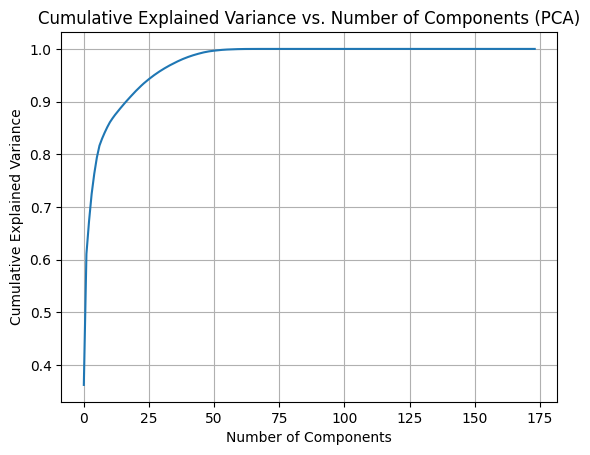

In [95]:
# Plot the cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components (PCA)')
plt.grid(True)
plt.show()

In [98]:
X_val_pca = pca.transform(fit_bal_val_df)
pca_bal_val_df = pd.DataFrame(data=X_val_pca[:, :num_components_exceeding_threshold], columns=[f'pca_{i+1}' for i in range(num_components_exceeding_threshold)])

In [99]:
X_bal_test = test_df
X_bal_test_pca = pca.transform(X_bal_test)

In [102]:
pca_bal_test_df = pd.DataFrame(data=X_bal_test_pca[:, :num_components_exceeding_threshold], columns=[f'pca_{i+1}' for i in range(num_components_exceeding_threshold)])

In [103]:
pca_bal_test_df

pca_1      pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0     -0.104969  -3.275524 -0.448486 -0.118707  0.673061 -0.531086  0.032356   
1     -0.536799  16.999276  0.093584 -0.021661  0.232642 -0.414915  0.199926   
2     -0.122248  -2.856673 -0.611985 -0.148980  3.089828  0.291212  0.287338   
3     -0.121669  -3.171878 -0.621629 -0.129312  3.097307  1.171080  0.265101   
4     -0.538101  15.795682  0.006216 -0.026572  0.553290 -2.485556  1.747569   
...         ...        ...       ...       ...       ...       ...       ...   
49995 -0.060124  -3.325665 -0.291374 -0.073129 -0.359650 -0.411017 -0.546862   
49996 -0.072662  -3.458264 -0.124619 -0.051655 -1.832903 -0.747933 -0.234724   
49997 -0.079337  -3.442875 -0.269087 -0.044499 -0.589628 -0.660722  0.160300   
49998 -0.041682  -4.042047 -0.000810 -0.055897 -2.398344 -0.270662 -0.606692   
49999 -0.073018  -3.445381  0.155669 -0.021488 -2.112615 -0.818660 -0.684670   

          pca_8     pca_9    pca_10  ...    pca_51    pca_52    pca_53  \
0      0.423649  0.195814 -0.704213  ...  0.098832 -0.055842 -0.422141   
1     -3.452461  2.039710 -0.447822  ... -0.026059  0.020459  0.262272   
2      0.420364 -1.025921  2.488374  ...  0.044084  1.123211  0.354193   
3      2.552573  3.201333  3.950007  ...  0.099650  0.220756  0.473007   
4      2.243379 -1.588708  2.377513  ...  0.014128 -0.007119  0.245794   
...         ...       ...       ...  ...       ...       ...       ...   
49995  0.565442  0.417573 -0.666107  ... -0.098423  0.046220  0.280392   
49996 -0.084751  0.140108 -0.080973  ...  0.009087 -0.052226  0.219682   
49997  0.107334  0.059071 -0.286779  ...  0.121877 -0.072063 -0.335663   
49998  0.206734  0.344413  0.289673  ...  0.156030 -0.072100  0.264805   
49999 -0.198632 -1.572625  1.043879  ... -0.071691 -0.025006  0.359902   

         pca_54    pca_55    pca_56    pca_57    pca_58    pca_59    pca_60  
0     -0.095449 -0.035882  0.010548  0.028253 -0.013079  0.014454  0.063966  
1     -0.063804 -0.051558 -0.072579 -0.066560  0.160621  0.034759 -0.028818  
2     -0.356314  0.194111  0.122168 -0.281140 -0.111301  0.255327 -1.063366  
3     -0.685075  0.282658 -0.077959 -0.408140  0.078856  0.138064  0.253316  
4      0.048709  0.053360 -0.009196 -0.013954 -0.011228  0.009290 -0.005471  
...         ...       ...       ...       ...       ...       ...       ...  
49995 -0.085811 -0.301756  0.091713  0.065855  0.053166  0.020367 -0.042835  
49996 -0.064077 -0.009581 -0.007488 -0.039836 -0.024832 -0.018738  0.000049  
49997 -0.066213 -0.037869  0.077011  0.089103 -0.005292 -0.005568  0.125560  
49998  0.259472  0.806378 -0.035556 -0.038895 -0.042895 -0.017880 -0.001644  
49999  0.046648 -0.072307  0.011417 -0.042152 -0.004921 -0.050774  0.020234  

[50000 rows x 60 columns]

##PCA - Principal Component Analysis - Unbalanced df

In [104]:
fit_unbal_train_df, fit_unbal_val_df = train_test_split(train_df, train_size = 80000, stratify = train_df['Target'], random_state=42)

fit_unbal_train_target = pd.DataFrame(fit_unbal_train_df['Target'])
fit_unbal_val_target = pd.DataFrame(fit_unbal_val_df['Target'])

fit_unbal_train_df.drop('Target', axis = 1, inplace = True)
fit_unbal_val_df.drop('Target', axis = 1, inplace = True)

In [105]:
X_unbal = fit_unbal_train_df
pca_unbal = PCA(n_components=X_unbal.shape[1] - 1)  # Choose the number of components
X_unbal_pca = pca_unbal.fit_transform(X_unbal)

In [107]:
cumulative_explained_variance_threshold = 0.9995

cumulative_explained_variance = np.cumsum(pca_unbal.explained_variance_ratio_)
num_components_exceeding_threshold = np.argmax(cumulative_explained_variance >= cumulative_explained_variance_threshold) + 1

# Capture the chosen columns based on the threshold
chosen_columns = fit_unbal_train_df.columns[:num_components_exceeding_threshold].tolist()

# Create a DataFrame with PCA components
pca_unbal_train_df = pd.DataFrame(data=X_unbal_pca[:, :num_components_exceeding_threshold], columns=[f'pca_{i+1}' for i in range(num_components_exceeding_threshold)])

In [108]:
print("\nPCA Components DataFrame:")
pca_unbal_train_df


PCA Components DataFrame:


pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0      -3.638047  0.133227 -2.746507  0.635651  6.362150  0.116145  2.013670   
1      -5.202940 -0.051666  0.587886 -0.939877 -0.756432  0.364824 -2.201007   
2      -4.825656 -0.012549  0.299774  0.007221 -0.147259 -0.809324 -1.339932   
3      -4.825116  0.068128 -0.564386  1.580848 -0.119202 -1.097743  2.442035   
4      -5.028773  0.049179 -0.106035  1.131000 -0.103378 -0.859991  2.455230   
...          ...       ...       ...       ...       ...       ...       ...   
79995  -5.006705  0.013607 -0.041288  0.335141 -0.180585 -0.845133  2.546969   
79996  14.797372 -0.181359  1.996100 -0.023495  3.996200  0.290843  2.076876   
79997  -4.826462 -0.031492  0.352348 -0.934800 -0.056361 -0.869404 -1.272975   
79998  -5.217612  0.043272 -0.256858  0.800416 -0.335155 -0.331878  2.532712   
79999  14.843439 -0.172441  1.889133  0.233537  3.631219  0.422721  1.459358   

          pca_8     pca_9    pca_10  ...    pca_55    pca_56    pca_57  \
0     -1.821597 -0.032768  0.250238  ... -0.143600 -0.205523 -0.136135   
1      1.769213 -0.060232  0.161024  ...  0.870365 -0.311656  0.762382   
2      0.542323  0.011727 -0.090794  ... -0.076008 -0.146956  0.009087   
3     -0.454501  0.058606 -0.117927  ...  0.007755 -0.200982 -0.064734   
4     -0.417773  0.026111 -0.034595  ...  0.120198 -0.166641  0.130435   
...         ...       ...       ...  ...       ...       ...       ...   
79995 -0.456928  0.037421 -0.091846  ...  0.092966 -0.210969 -0.061008   
79996 -1.075050  0.003288  0.035917  ...  0.045959 -0.181174 -0.052187   
79997  2.706155 -0.051486 -0.008253  ... -0.201240 -0.217218 -0.088302   
79998 -0.839527  0.022514  0.030168  ...  0.078417 -0.220033 -0.068263   
79999 -1.247100 -0.012082  0.120011  ... -0.089597 -0.199296 -0.136473   

         pca_58    pca_59    pca_60    pca_61    pca_62    pca_63    pca_64  
0      0.158866  0.301700  0.146013  0.070946 -0.062095 -0.041215 -0.083299  
1      1.370360 -0.756452  0.171937  0.153773  0.465635 -0.946377  0.000220  
2     -0.306028 -0.237625  0.093064 -0.030710 -0.000209  0.146391 -0.000570  
3      0.156817  0.247986 -0.015191 -0.004984 -0.014752  0.012376 -0.010919  
4      0.077647 -0.092890 -1.480531  0.053433 -0.034911 -0.089182  0.009001  
...         ...       ...       ...       ...       ...       ...       ...  
79995  0.095293  0.156984 -0.149514  0.006677  0.021517 -0.031018 -0.000743  
79996  0.140629  0.142221  0.001580  0.067585 -0.067624 -0.047445 -0.072226  
79997 -0.101885  0.296511  0.166894  0.061541 -0.177028  0.120729 -0.027486  
79998  0.000047  0.223388  0.255176 -0.027407 -0.053561  0.003164  0.000139  
79999  0.018134  0.273651  0.002181  0.007172 -0.098620  0.077168 -0.082198  

[80000 rows x 64 columns]

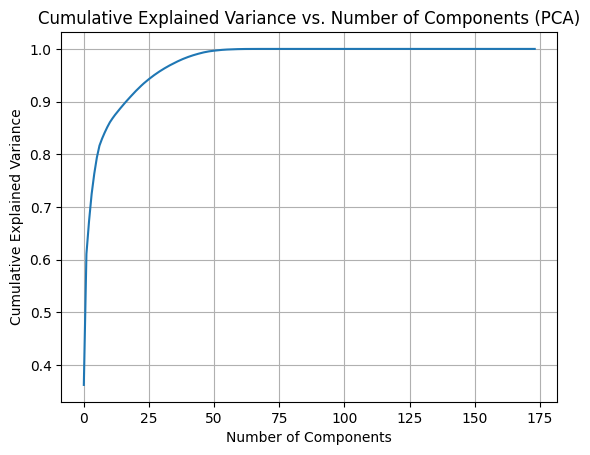

In [ ]:
# Plot the cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components (PCA)')
plt.grid(True)
plt.show()

In [112]:
X_unbal_val_pca = pca_unbal.transform(fit_unbal_val_df)
pca_unbal_val_df = pd.DataFrame(data=X_unbal_val_pca[:, :num_components_exceeding_threshold], columns=[f'pca_{i+1}' for i in range(num_components_exceeding_threshold)])

X_unbal_test = test_df
X_unbal_test_pca = pca_unbal.transform(X_unbal_test)

pca_unbal_test_df = pd.DataFrame(data=X_unbal_test_pca[:, :num_components_exceeding_threshold], columns=[f'pca_{i+1}' for i in range(num_components_exceeding_threshold)])

In [114]:
pca_unbal_test_df

pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0      -5.341936  0.033157  0.263225  1.329878 -0.592806 -0.538525 -1.751775   
1      14.761333 -0.168492  1.915046 -0.024335  3.993876  0.085371 -1.337533   
2      -5.236888 -0.008887 -0.086562  0.586922 -0.657033  0.485486  2.118574   
3      -5.497351  0.021839 -0.809931 -0.504368 -1.372972  5.209510  2.210395   
4      13.372012 -0.253800  3.878612  0.265514 -2.791468 -0.150341  2.354052   
...          ...       ...       ...       ...       ...       ...       ...   
49995  -5.295468  0.088873 -0.113560  2.338750 -0.506309 -0.551069 -1.523651   
49996  -5.269743  0.111424  0.252390  3.472121 -0.130002 -1.065443 -1.153923   
49997  -5.386236  0.059734  0.364419  2.551276 -0.359343 -0.788617 -1.310802   
49998  -5.705975  0.138529 -0.320036  3.729161 -0.400367 -0.930857 -1.060237   
49999  -5.157252  0.131712 -0.013737  3.630849 -0.117868 -1.083928  2.067888   

          pca_8     pca_9    pca_10  ...    pca_55    pca_56    pca_57  \
0     -1.078250 -0.028425  0.034036  ... -0.178368 -0.211204 -0.131291   
1     -0.891833  0.005164 -0.092683  ...  0.040899 -0.172168  0.034557   
2     -0.928348  0.019805  0.143255  ...  0.643508  0.917998  0.364526   
3     -3.196218  0.050716 -0.129164  ...  0.033583 -0.164856  0.137803   
4     -0.542967  0.057733 -0.143085  ...  0.137240  1.006652  0.068476   
...         ...       ...       ...  ...       ...       ...       ...   
49995 -1.454028  0.012902  0.030021  ... -0.018752 -0.197625  0.171280   
49996 -1.691263 -0.023352 -0.047400  ... -0.011324 -0.210028  0.130562   
49997 -1.361364 -0.019421 -0.029134  ... -0.235468 -0.255568 -0.165207   
49998 -2.123407  0.022107 -0.029721  ...  0.024719  0.986962  0.029575   
49999 -0.264828 -0.055775  0.191730  ...  0.074994 -0.343510  0.160423   

         pca_58    pca_59    pca_60    pca_61    pca_62    pca_63    pca_64  
0      0.026255  0.344058  0.193484 -0.007876 -0.078271  0.075053 -0.007743  
1     -0.063252 -0.240694 -0.074265 -0.043977  0.101495  0.006374 -0.071025  
2      0.933955 -0.430308  0.258008  0.221420  0.472633 -0.711417  0.005017  
3      0.661677 -0.461630  0.042635 -0.228254  0.709923  0.572487 -0.005902  
4     -0.054907 -0.253126 -0.005483 -0.046588  0.089151 -0.040950  0.013451  
...         ...       ...       ...       ...       ...       ...       ...  
49995 -0.092204 -0.275324 -0.196142  0.012590 -0.072248 -0.007841 -0.007463  
49996 -0.045674 -0.219259  0.072330 -0.011375 -0.070484 -0.000517  0.009226  
49997 -0.069312  0.331802  0.173813  0.056239 -0.193875  0.146548 -0.006295  
49998 -0.020022 -0.077303  0.102931 -0.037476 -0.018068  0.020885 -0.068596  
49999 -0.179290 -0.198883  0.079858 -0.106530 -0.103459  0.043702 -0.000295  

[50000 rows x 64 columns]

# Model = HistGradient / XGBoost / LightGBM / CatBoost Metrics

Balanced Dataset send thru LightGBM, and unbalanced thru XGBoost

In [116]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier as HGBC
from sklearn.ensemble import RandomForestClassifier as RFC
from lightgbm import LGBMClassifier as LGBMC
from xgboost import XGBClassifier as XGBC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [124]:
def print_acc_conf_mtx(model, clf, Y_val, y_pred):
    accuracy = accuracy_score(Y_val, y_pred)
    conf_matrix = confusion_matrix(Y_val, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.title(f'Confusion Matrix for {model}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    f1 = f1_score(Y_val, y_pred, average='weighted')
    print(f'F1 Score for {model}: {f1:.4f}')
    print(f'Accuracy for {model}: {accuracy:.4f}')

In [125]:
def Model(X_train, X_val, Y_train, Y_val):
    clf_XGBC = XGBC(random_state=42)
    clf_XGBC.fit(X_train, Y_train)
    XGBC_y_pred = clf_XGBC.predict(X_val)
    print_acc_conf_mtx("XGBoost Classifier", clf_XGBC, Y_val, XGBC_y_pred)

    clf_LGBMC = LGBMC(random_state=42)
    clf_LGBMC.fit(X_train, Y_train)
    LGBMC_y_pred = clf_LGBMC.predict(X_val)
    print_acc_conf_mtx("Light GBM Classifier", clf_LGBMC, Y_val, LGBMC_y_pred)

    clf_HGBC = HGBC(random_state=42)
    clf_HGBC.fit(X_train, Y_train)
    HGBC_y_pred = clf_HGBC.predict(X_val)
    print_acc_conf_mtx("Hist Gradient Boosting Classifier", clf_HGBC, Y_val, HGBC_y_pred)

    clf_RFC = RFC(random_state=42)
    clf_RFC.fit(X_train, Y_train)
    RFC_y_pred = clf_RFC.predict(X_val)
    print_acc_conf_mtx("RandomForestClassifier", clf_RFC, Y_val, RFC_y_pred)

In [ ]:
Model(pca_bal_train_df, pca_bal_val_df, fit_bal_train_target, fit_bal_val_target)

In [ ]:
Model(pca_unbal_train_df, pca_unbal_val_df, fit_unbal_train_target, fit_unbal_val_target)

Using the above metrics, we see that Random Forest Classifier works best on a balanced dataset, while XGBoost Classifier works best on an unbalanced one. We now use a confidence interval to decide the outputs

In [133]:
clf_bal = RFC(random_state = 42)
clf_bal.fit(pca_bal_train_df, fit_bal_train_target)
y_bal_pred = clf_bal.predict(pca_bal_test_df)
y_bal_proba = clf_bal.predict_proba(pca_bal_test_df)

clf_unbal = XGBC(random_state = 42)
clf_unbal.fit(pca_unbal_train_df, fit_unbal_train_target)
y_unbal_pred = clf_unbal.predict(pca_unbal_test_df)
y_unbal_proba = clf_unbal.predict_proba(pca_unbal_test_df)

<ipython-input-133-980407cc6f8b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_bal.fit(pca_bal_train_df, fit_bal_train_target)


In [149]:
BM_probab = (1 - y_bal_pred) * y_bal_proba[:,0] + (y_bal_pred) * y_bal_proba[:,1]
UBM_probab = (1 - y_unbal_pred) * y_unbal_proba[:,0] + (y_unbal_pred) * y_unbal_proba[:,1]

In [150]:
tgt = []
prb = []

In [152]:
for i in range(len(y_unbal_pred)):
  if(y_bal_pred[i] == y_unbal_pred[i]):
    t = y_bal_pred[i]
    tgt.append(t)
    prb.append( t * y_bal_proba[i][1] + (1 - t) * y_unbal_proba[i][1] )
  else:
    t_bm = y_bal_pred[i]
    t_ubm = y_unbal_pred[i]
    if( BM_probab[i] > UBM_probab[i] ):
      tgt.append(t_bm)
      prb.append( y_bal_proba[i][1] )
    else:
      tgt.append(t_ubm)
      prb.append( y_unbal_proba[i][1] )

In [158]:
test_primary['target values'] = tgt
test_primary['probability'] = prb

In [159]:
test_primary

Primary key  Target  Probabilities
0          9000001       0   2.564498e-04
1          9000002       0   1.715912e-07
2          9000003       0   2.745861e-06
3          9000004       0   2.319748e-06
4          9000005       0   3.163029e-07
...            ...     ...            ...
49995      9049996       1   8.600000e-01
49996      9049997       1   1.000000e+00
49997      9049998       1   9.200000e-01
49998      9049999       1   1.000000e+00
49999      9050000       1   1.000000e+00

[50000 rows x 3 columns]

In [160]:
test_primary.to_csv('/content/Submission.csv', index=False)